# Matplotlib & Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
us_df = pd.read_csv("U.S.Death.csv")
us_df.head(10)

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
5,High Sheriff John Caldwell Cook,"Mecklenburg County Sheriff's Office, NC","EOW: Tuesday, October 16, 1804",Cause of Death: Gunfire,Gunfire,1804-10-16,1804,False,Mecklenburg County Sheriff's Office,NC
6,Watchman Christian Luswanger,"New York City Watch, NY","EOW: Thursday, December 25, 1806",Cause of Death: Stabbed,Stabbed,1806-12-25,1806,False,New York City Watch,NY
7,Deputy Sheriff John A. Gooch,"Livingston County Sheriff's Department, KY","EOW: Saturday, March 7, 1807",Cause of Death: Gunfire,Gunfire,1807-03-07,1807,False,Livingston County Sheriff's Department,KY
8,Deputy Sheriff Ebenezer Parker,"Cumberland County Sheriff's Office, ME","EOW: Monday, January 18, 1808",Cause of Death: Assault,Assault,1808-01-18,1808,False,Cumberland County Sheriff's Office,ME
9,Night Watchman George Workner,"Baltimore City Police Department, MD","EOW: Tuesday, March 15, 1808",Cause of Death: Stabbed,Stabbed,1808-03-15,1808,False,Baltimore City Police Department,MD


## 1) Bar chart showing the total deaths per year for 1984-2016.

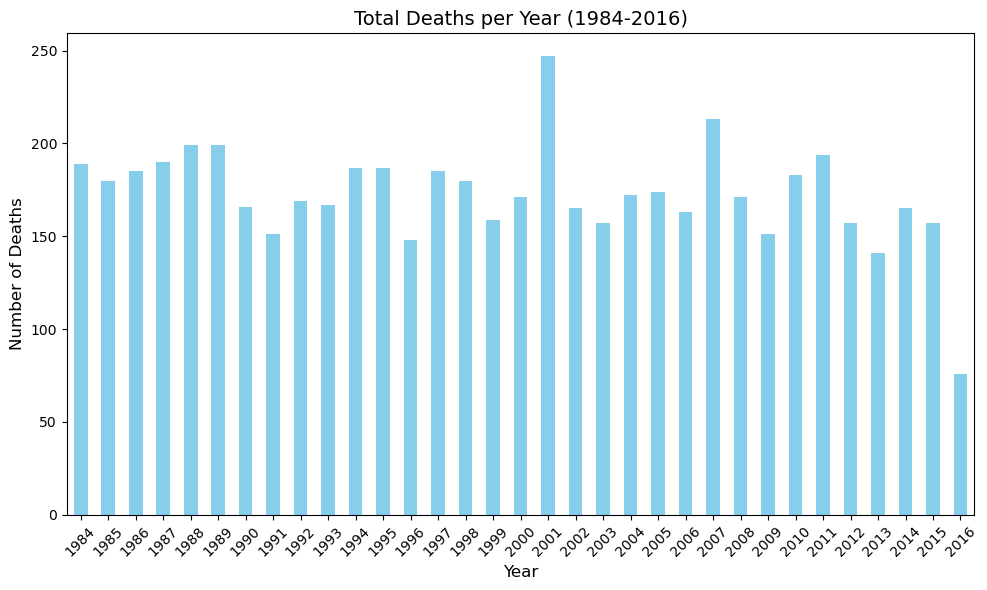

In [3]:
# Filter data for years between 1984 and 2016
filtered_data = us_df[(us_df['year'] >= 1984) & (us_df['year'] <= 2016)]

# Group by year and count deaths
deaths_per_year = filtered_data.groupby('year').size()

# Create the bar chart
plt.figure(figsize=(10,6))
deaths_per_year.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Total Deaths per Year (1984-2016)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## 2) Line chart comparing the yearly deaths in different states.

<Figure size 1200x800 with 0 Axes>

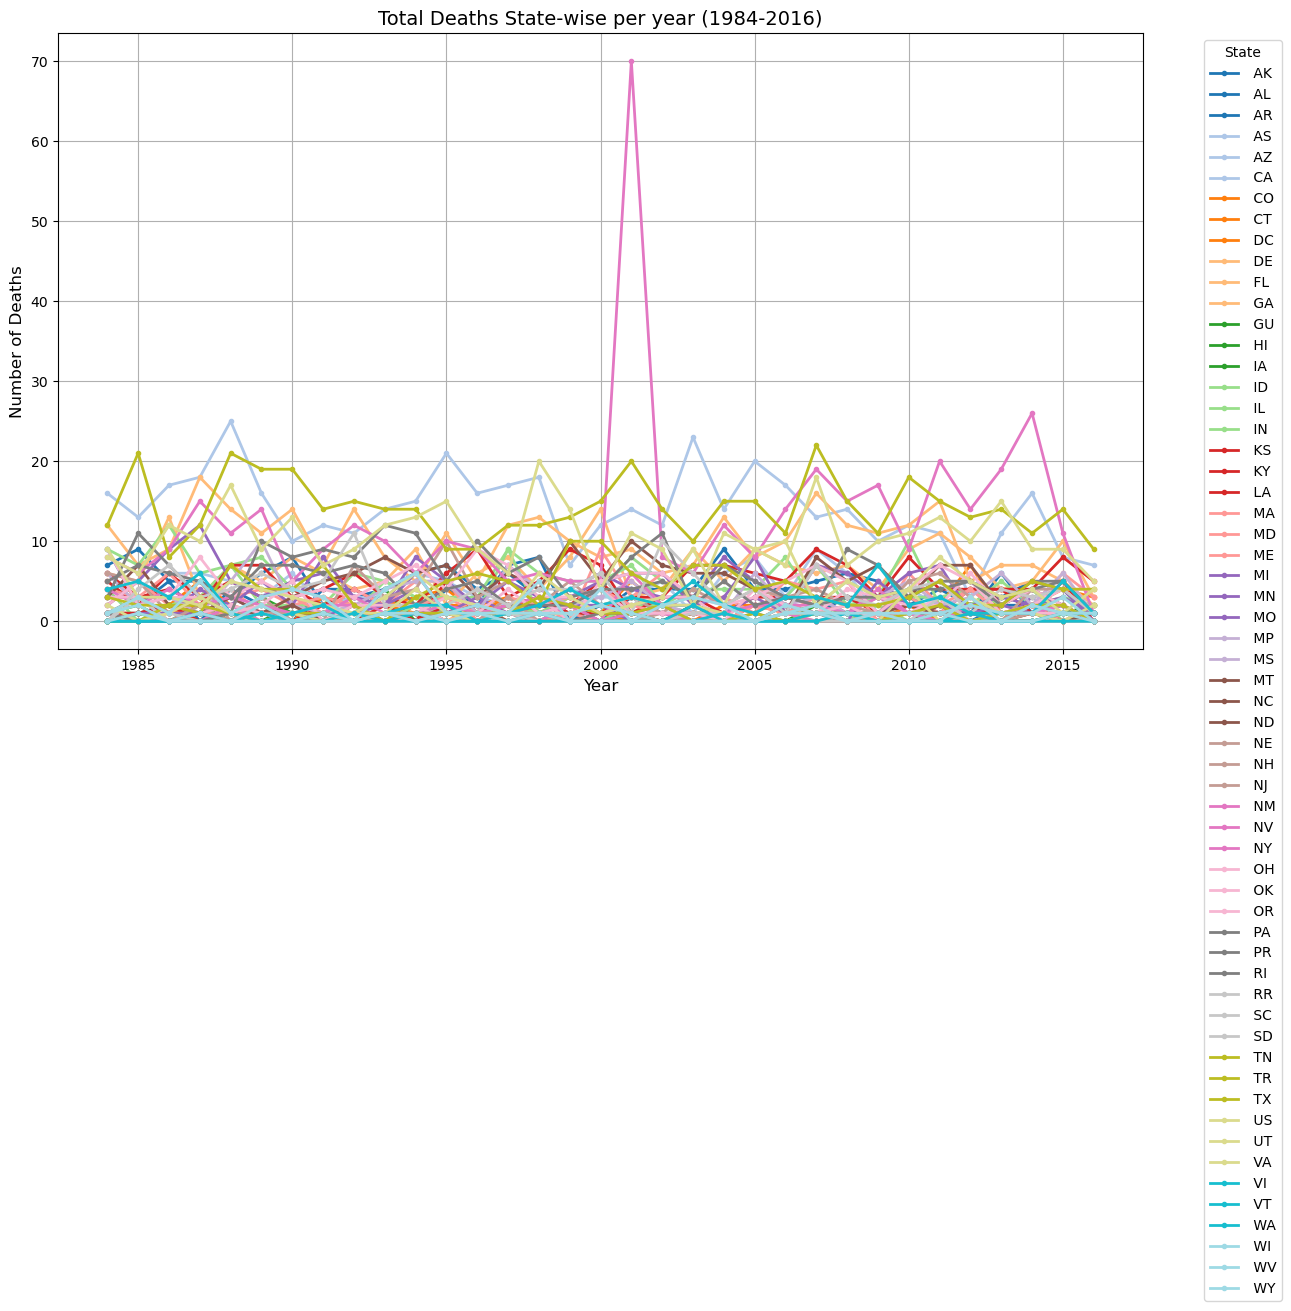

In [4]:
state_death = filtered_data.groupby(["year", "state"]).size().unstack(fill_value=0)
# state_death.head()
plt.figure(figsize=(12,8))
state_death.plot(kind="line", lw=2, colormap='tab20', figsize=(14,8), marker = '.')

plt.title('Total Deaths State-wise per year (1984-2016)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

## 3) A heat map overlaid on the map of the United States

In [5]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Sample state coordinates (approximate center of each state)
state_coords = {
    'NY': [43.2994, -74.2179],
    'CA': [36.7783, -119.4179],
    'TX': [31.9686, -99.9018],
    'FL': [27.9944, -81.7603],
    # Add other states as needed...
}

# Load your dataset (filtered data already used)
data = pd.read_csv("U.S.Death.csv")

# Filter years 1984-2016 and group by state
filtered_data = data[(data['year'] >= 1984) & (data['year'] <= 2016)]
deaths_by_state = filtered_data.groupby('state').size().reset_index(name='deaths')

# Add latitude and longitude for each state from the state_coords dictionary
deaths_by_state['coords'] = deaths_by_state['state'].map(state_coords)

# Create a map centered on the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Prepare data for the heat map
heat_data = [[row['coords'][0], row['coords'][1], row['deaths']] for index, row in deaths_by_state.iterrows() if row['coords']]

# Add the heat map
HeatMap(heat_data).add_to(us_map)

# Save map to an HTML file
us_map.save("us_deaths_heatmap.html")

# To display in Jupyter, you can use:
# us_map

TypeError: 'float' object is not subscriptable

## 4) A Choropleth comparing the number of police deaths in different states

In [6]:
import pandas as pd
import folium

# Sample U.S. states GeoJSON URL (you can replace with your own GeoJSON file)
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

# Load your dataset (filtered data already used)
data = pd.read_csv("U.S.Death.csv")

# Filter years 1984-2016 and group by state
filtered_data = data[(data['year'] >= 1984) & (data['year'] <= 2016)]
deaths_by_state = filtered_data.groupby('state').size().reset_index(name='deaths')

# Create a map centered on the US
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add the Choropleth layer
folium.Choropleth(
    geo_data=geojson_url,
    name="choropleth",
    data=deaths_by_state,
    columns=["state", "deaths"],
    key_on="feature.id",  # Change depending on the GeoJSON key for states (e.g., feature.properties.NAME)
    fill_color="YlOrRd",  # Color scheme for the map
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Police Deaths"
).add_to(us_map)

# Add layer control
folium.LayerControl().add_to(us_map)

# Save the map to an HTML file
us_map.save("us_deaths_choropleth.html")

# To display in Jupyter, you can use:
us_map

## 5) A word cloud of the different causes of death (remove the string "Cause of Death:" for best results)

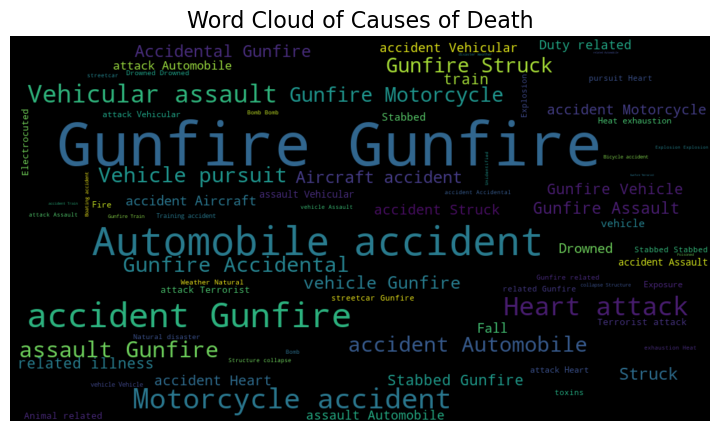

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("U.S.Death.csv")

# Clean the 'cause' column by removing the "Cause of Death:" string
data['clean_cause'] = data['cause'].str.replace('Cause of Death:', '').str.strip()

# Combine all causes into a single string for word cloud generation
text = ' '.join(cause for cause in data['clean_cause'])

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=550, background_color='Black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis
plt.title('Word Cloud of Causes of Death', fontsize=16)
plt.show()

## 6) A marker cluster showing the shootings in the state of California (show person's name on hover)

In [8]:
from folium.plugins import MarkerCluster

# Load the dataset
data = pd.read_csv("U.S.Death.csv")

# Filter for shootings in California (assuming 'Gunfire' as shooting cause)
california_data = data[(data['state'] == 'CA') & (data['cause_short'] == 'Gunfire')]

# Create a map centered on California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Initialize a MarkerCluster
marker_cluster = MarkerCluster().add_to(california_map)

# Add markers for each incident in California
for index, row in california_data.iterrows():
    folium.Marker(
        location=[36.7783, -119.4179],  # Use state center coordinates or specific location if available
        popup=row['person'],  # Person's name on hover
        tooltip=row['person']  # Tooltip on hover
    ).add_to(marker_cluster)

# Save the map to an HTML file
california_map.save("california_shootings_marker_cluster.html")

# To display in Jupyter, you can use:
california_map

## 7) Bar chart comparing the no. of deaths due to different causes, animated by year

MovieWriter imagemagick unavailable; using Pillow instead.


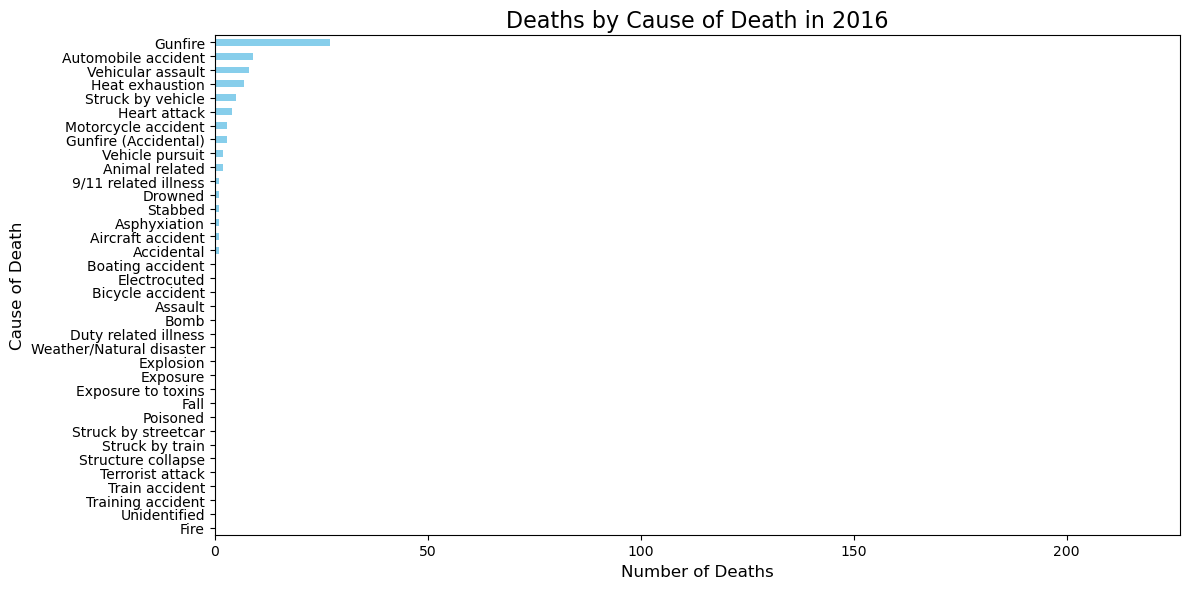

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the dataset
data = pd.read_csv("U.S.Death.csv")

# Clean the 'cause' column by removing the "Cause of Death:" string
data['clean_cause'] = data['cause'].str.replace('Cause of Death:', '').str.strip()

# Group by year and cause to get the number of deaths
deaths_by_cause_year = data.groupby(['year', 'clean_cause']).size().unstack(fill_value=0)

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 6))

def update(year):
    ax.clear()  # Clear the previous bar chart
    deaths_by_cause_year.loc[year].sort_values().plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(f'Deaths by Cause of Death in {year}', fontsize=16)
    ax.set_xlabel('Number of Deaths', fontsize=12)
    ax.set_ylabel('Cause of Death', fontsize=12)
    ax.set_xlim(0, deaths_by_cause_year.max().max() * 1.1)  # Adjust x limit for better visibility
    plt.tight_layout()

# Create animation
years = deaths_by_cause_year.index.tolist()
ani = FuncAnimation(fig, update, frames=years, repeat=False)

# Save the animation as a gif
ani.save('deaths_by_cause_animation.gif', writer='imagemagick')

# To display the plot in Jupyter, you can use:
plt.show()

## 8) A heatmap of total deaths per state per year i.e., showing "state" on one axis and "year" on the other axis.

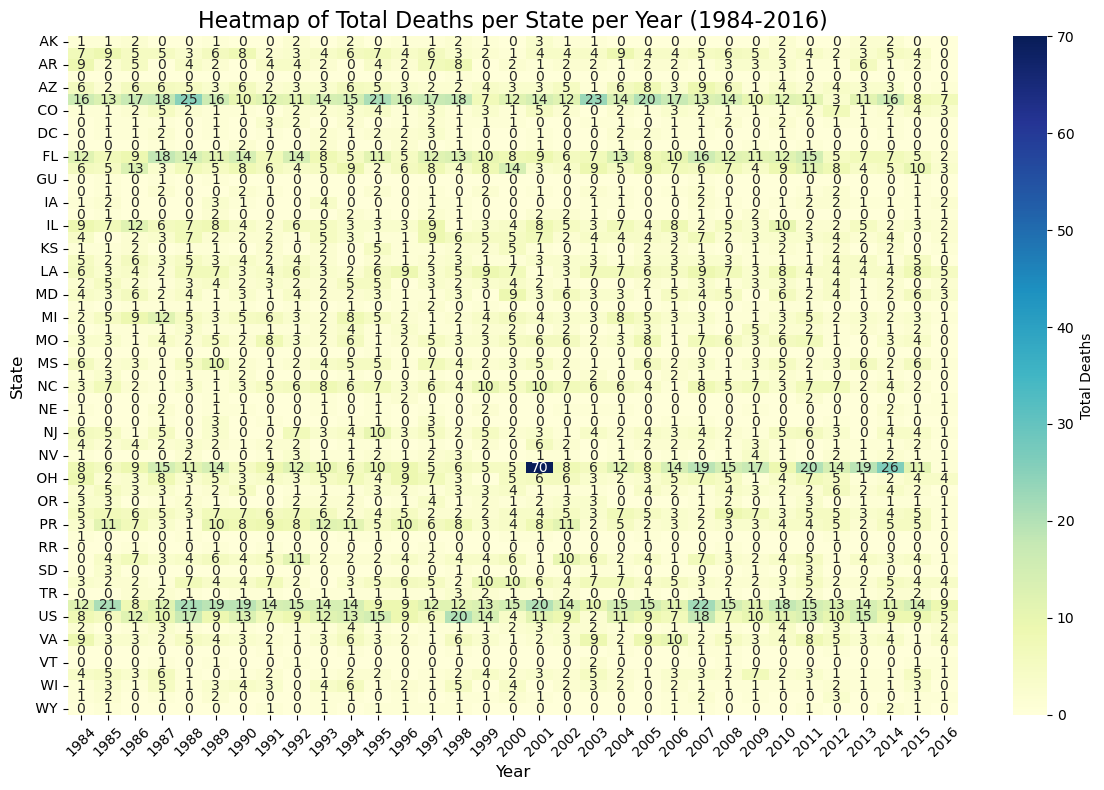

In [10]:
# Load the dataset
data = pd.read_csv("U.S.Death.csv")

# Filter the data for the years 1984-2016
filtered_data = data[(data['year'] >= 1984) & (data['year'] <= 2016)]

# Group by state and year to get total deaths
deaths_per_state_year = filtered_data.groupby(['state', 'year']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(deaths_per_state_year, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Total Deaths'})

# Customize the chart
plt.title('Heatmap of Total Deaths per State per Year (1984-2016)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

## 9) A tree map with three levels: state, city (description), cause

In [11]:
import squarify
# Load the dataset
data = pd.read_csv("U.S.Death.csv")

# Clean the 'cause' column by removing the "Cause of Death:" string
data['clean_cause'] = data['cause'].str.replace('Cause of Death:', '').str.strip()

# Group by state, city/description, and cause to get total deaths
grouped_data = data.groupby(['state', 'dept', 'clean_cause']).size().reset_index(name='total_deaths')

# Create a new column to use as labels for the tree map
grouped_data['label'] = grouped_data['state'] + ' / ' + grouped_data['dept'] + ' / ' + grouped_data['clean_cause']

# Create a tree map
plt.figure(figsize=(15, 10))
squarify.plot(sizes=grouped_data['total_deaths'], label=grouped_data['label'], color=squarify.generate_colors(grouped_data['total_deaths']), alpha=.7)

# Customize the chart
plt.title('Tree Map of Deaths by State, City(dept), and Cause', fontsize=16)
plt.axis('off')  # Turn off the axis

# Show the plot
plt.show()

AttributeError: module 'squarify' has no attribute 'generate_colors'

<Figure size 1500x1000 with 0 Axes>

## 10) A rug plot showing a timeline of canine deaths.

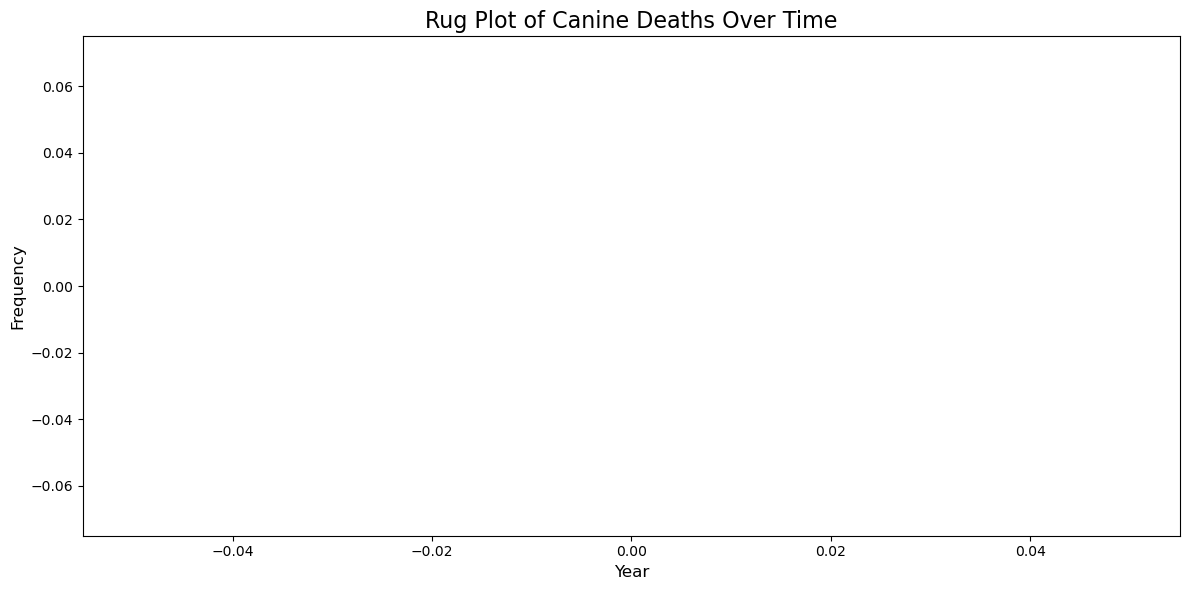

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("U.S.Death.csv")

# Filter the dataset for canine deaths
# Assuming there is a specific column that indicates if a death is related to canines
canine_deaths = data[data['cause'].str.contains('canine', case=False, na=False)]

# Create a rug plot
plt.figure(figsize=(12, 6))
sns.rugplot(x='year', data=canine_deaths, color='b', height=0.1)

# Customize the chart
plt.title('Rug Plot of Canine Deaths Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()